# Names in Freiburg 

In [2]:
import pandas as pd
%matplotlib inline

pd.options.display.max_rows = 999
pd.options.display.max_colwidth = 1000

[Open Data Portal Freiburg](https://fritz.freiburg.de:8443/Informationsportal/configurator?scenario=OpenData) 

- Nach Vornamen suchen
- Datei herunterladen, in /data speichern 

In [3]:
# make a data frame from csv 
df = pd.read_csv('data/de-bw-freiburg-vornamen_nach_jahr_geschlecht_und_alter_-_zeitreihe.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe4 in position 30: invalid continuation byte

Uups? What happend? 
As a standard 'utf-8' is used as encoding (Translation of special characters like 'ä,ö,ü'). In a lot of open data files other encodings are used. In this case you have to set encoding to 'iso-8859-1'  

In [4]:
df = pd.read_csv('data/de-bw-freiburg-vornamen_nach_jahr_geschlecht_und_alter_-_zeitreihe.csv', 
                  encoding='iso-8859-1')

In [5]:
df.head()

,"Jahr;""Geschlecht"";""Altersgruppe"";""Rang des Vornamen"";""Vorname"";""Hilfsmerkmal: Anzahl Name insgesamt"";""Anzahl Personen"""
0,"2016;""weiblich"";""50 bis unter 60 Jahre"";""2.Vorname"";""Maria "";""6099"";974"
1,"2016;""weiblich"";""75 Jahre und älter"";""2.Vorname"";""Maria "";""6099"";921"
2,"2016;""männlich"";""50 bis unter 60 Jahre"";""1.Vorname"";""Thomas "";""2062"";648"
3,"2016;""männlich"";""50 bis unter 60 Jahre"";""1.Vorname"";""Michael "";""3135"";628"
4,"2016;""weiblich"";""20 bis unter 30 Jahre"";""1.Vorname"";""Julia "";""1265"";518"


Still the DataFrame does not look nice. Even if it is a 'comma seperated value' (.csv) file, in this case it has a different seperator.  

In [6]:
df = pd.read_csv('data/de-bw-freiburg-vornamen_nach_jahr_geschlecht_und_alter_-_zeitreihe.csv', 
                  encoding='iso-8859-1', sep=';')

In [7]:
df.head()

,Jahr,Geschlecht,Altersgruppe,Rang des Vornamen,Vorname,Hilfsmerkmal: Anzahl Name insgesamt,Anzahl Personen
0,2016,weiblich,50 bis unter 60 Jahre,2.Vorname,Maria,6099,974
1,2016,weiblich,75 Jahre und älter,2.Vorname,Maria,6099,921
2,2016,männlich,50 bis unter 60 Jahre,1.Vorname,Thomas,2062,648
3,2016,männlich,50 bis unter 60 Jahre,1.Vorname,Michael,3135,628
4,2016,weiblich,20 bis unter 30 Jahre,1.Vorname,Julia,1265,518


In [8]:
df.tail()

,Jahr,Geschlecht,Altersgruppe,Rang des Vornamen,Vorname,Hilfsmerkmal: Anzahl Name insgesamt,Anzahl Personen
68710,2016,weiblich,75 Jahre und älter,2.Vorname,Wilhemina,1,1
68711,2016,weiblich,75 Jahre und älter,2.Vorname,Winfriede,3,1
68712,2016,weiblich,75 Jahre und älter,2.Vorname,Xuan,5,1
68713,2016,weiblich,75 Jahre und älter,2.Vorname,Zäzilia,4,1
68714,2016,weiblich,75 Jahre und älter,2.Vorname,Zofia,16,1


In [9]:
# How many rows has the DataFrame?
len(df)

68715

In [10]:
df = df.str.strip()

AttributeError: 'DataFrame' object has no attribute 'str'

## Filtering 

In [10]:
weiblich = df[df['Geschlecht'] == 'weiblich']

In [11]:
len(weiblich)

35439

In [12]:
weiblich_erster = weiblich[weiblich['Rang des Vornamen'] == '1.Vorname']

In [13]:
len(weiblich_erster)

24730

In [14]:
weiblich_erster.Altersgruppe.value_counts()

20 bis unter 30 Jahre    4763
30 bis unter 40 Jahre    3583
40 bis unter 50 Jahre    2753
50 bis unter 60 Jahre    2047
5 bis unter 10 Jahre     1779
15 bis unter 20 Jahre    1775
10 bis unter 15 Jahre    1697
1 bis unter 5 Jahre      1599
75 Jahre und älter       1248
60 bis unter 65 Jahre    1129
65 bis unter 70 Jahre    1002
70 bis unter 75 Jahre     828
0 bis unter 1 Jahr        527
Name: Altersgruppe, dtype: int64

In [15]:
weiblich_babys_erster = weiblich_erster[weiblich_erster['Altersgruppe'] == '0 bis unter 1 Jahr'] 

In [16]:
weiblich_babys_erster

,Jahr,Geschlecht,Altersgruppe,Rang des Vornamen,Vorname,Hilfsmerkmal: Anzahl Name insgesamt,Anzahl Personen
2837,2016,weiblich,0 bis unter 1 Jahr,1.Vorname,Sophia,614,19
3505,2016,weiblich,0 bis unter 1 Jahr,1.Vorname,Marie,1268,15
3997,2016,weiblich,0 bis unter 1 Jahr,1.Vorname,Emilia,257,13
3998,2016,weiblich,0 bis unter 1 Jahr,1.Vorname,Emma,364,13
4298,2016,weiblich,0 bis unter 1 Jahr,1.Vorname,Ella,165,12
4299,2016,weiblich,0 bis unter 1 Jahr,1.Vorname,Lea,433,12
4300,2016,weiblich,0 bis unter 1 Jahr,1.Vorname,Lina,302,12
4301,2016,weiblich,0 bis unter 1 Jahr,1.Vorname,Mia,201,12
4302,2016,weiblich,0 bis unter 1 Jahr,1.Vorname,Mila,86,12
4636,2016,weiblich,0 bis unter 1 Jahr,1.Vorname,Anna,2430,11


In [17]:
weiblich_babys_erster = weiblich_babys_erster[['Anzahl Personen', 'Vorname']]

In [18]:
weiblich_babys_erster.head()

,Anzahl Personen,Vorname
2837,19,Sophia
3505,15,Marie
3997,13,Emilia
3998,13,Emma
4298,12,Ella


In [19]:
weiblich_babys_erster = weiblich_babys_erster.set_index('Vorname')

In [20]:
weiblich_babys_erster.head()

,Anzahl Personen
Vorname,
Sophia,19
Marie,15
Emilia,13
Emma,13
Ella,12


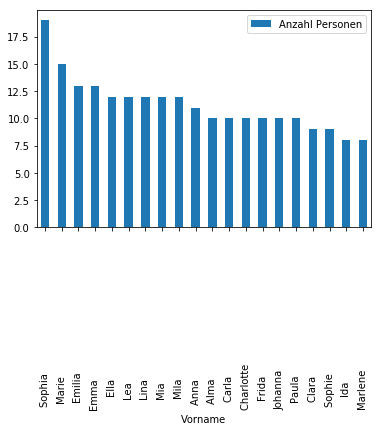

In [21]:
weiblich_babys_erster.head(20).plot(kind='bar')

In [22]:
weiblich_babys_erster.index

Index(['Sophia                                            ',
       'Marie                                             ',
       'Emilia                                            ',
       'Emma                                              ',
       'Ella                                              ',
       'Lea                                               ',
       'Lina                                              ',
       'Mia                                               ',
       'Mila                                              ',
       'Anna                                              ',
       ...
       'Wilma                                             ',
       'Yasmin                                            ',
       'Yassira                                           ',
       'Ylva                                              ',
       'Ylvi                                              ',
       'Zahra                                             ',
       'Zivan

In [23]:
# remove whitespace 
weiblich_babys_erster.index = weiblich_babys_erster.index.str.strip()

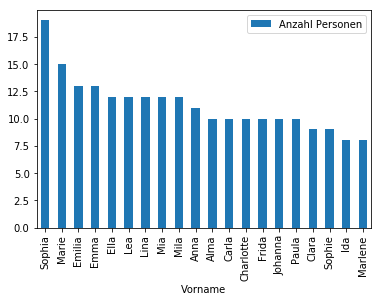

In [24]:
weiblich_babys_erster.head(20).plot(kind='bar')

In [25]:
# clean the whole DataFrame
df.Vorname = df.Vorname.str.strip()

## YOU DO IT 

- What where the most popular baby names for boys in 2016?
- What is the most popular female name in the age group '65 bis unter 70 Jahre'

In [26]:
patricia = df[df['Vorname'] == 'Patricia']

In [27]:
patricia

,Jahr,Geschlecht,Altersgruppe,Rang des Vornamen,Vorname,Hilfsmerkmal: Anzahl Name insgesamt,Anzahl Personen
776,2016,weiblich,20 bis unter 30 Jahre,1.Vorname,Patricia,286,61
1086,2016,weiblich,40 bis unter 50 Jahre,1.Vorname,Patricia,286,47
1329,2016,weiblich,50 bis unter 60 Jahre,1.Vorname,Patricia,286,40
1488,2016,weiblich,30 bis unter 40 Jahre,1.Vorname,Patricia,286,36
2874,2016,weiblich,30 bis unter 40 Jahre,2.Vorname,Patricia,286,19
3181,2016,weiblich,50 bis unter 60 Jahre,2.Vorname,Patricia,286,17
3342,2016,weiblich,20 bis unter 30 Jahre,2.Vorname,Patricia,286,16
4026,2016,weiblich,15 bis unter 20 Jahre,1.Vorname,Patricia,286,13
5159,2016,weiblich,40 bis unter 50 Jahre,2.Vorname,Patricia,286,10
8944,2016,weiblich,10 bis unter 15 Jahre,2.Vorname,Patricia,286,5


In [28]:
patricia_erster = patricia[patricia['Rang des Vornamen'] == '1.Vorname']

In [29]:
patricia_erster.Altersgruppe.sort_values()

46829      1 bis unter 5 Jahre
20089    10 bis unter 15 Jahre
4026     15 bis unter 20 Jahre
776      20 bis unter 30 Jahre
1488     30 bis unter 40 Jahre
1086     40 bis unter 50 Jahre
19785     5 bis unter 10 Jahre
1329     50 bis unter 60 Jahre
11382    60 bis unter 65 Jahre
15064    65 bis unter 70 Jahre
Name: Altersgruppe, dtype: object

In [30]:
patricia_erster

,Jahr,Geschlecht,Altersgruppe,Rang des Vornamen,Vorname,Hilfsmerkmal: Anzahl Name insgesamt,Anzahl Personen
776,2016,weiblich,20 bis unter 30 Jahre,1.Vorname,Patricia,286,61
1086,2016,weiblich,40 bis unter 50 Jahre,1.Vorname,Patricia,286,47
1329,2016,weiblich,50 bis unter 60 Jahre,1.Vorname,Patricia,286,40
1488,2016,weiblich,30 bis unter 40 Jahre,1.Vorname,Patricia,286,36
4026,2016,weiblich,15 bis unter 20 Jahre,1.Vorname,Patricia,286,13
11382,2016,weiblich,60 bis unter 65 Jahre,1.Vorname,Patricia,286,4
15064,2016,weiblich,65 bis unter 70 Jahre,1.Vorname,Patricia,286,3
19785,2016,weiblich,5 bis unter 10 Jahre,1.Vorname,Patricia,286,2
20089,2016,weiblich,10 bis unter 15 Jahre,1.Vorname,Patricia,286,2
46829,2016,weiblich,1 bis unter 5 Jahre,1.Vorname,Patricia,286,1


In [31]:
patricia_erster = patricia_erster[['Anzahl Personen', 'Altersgruppe']]

In [32]:
patricia_erster = patricia_erster.set_index('Altersgruppe')

In [33]:
patricia_erster

,Anzahl Personen
Altersgruppe,
20 bis unter 30 Jahre,61
40 bis unter 50 Jahre,47
50 bis unter 60 Jahre,40
30 bis unter 40 Jahre,36
15 bis unter 20 Jahre,13
60 bis unter 65 Jahre,4
65 bis unter 70 Jahre,3
5 bis unter 10 Jahre,2
10 bis unter 15 Jahre,2


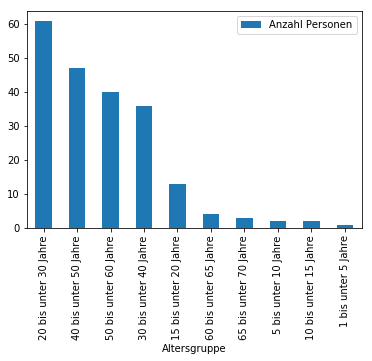

In [34]:
patricia_erster.plot(kind='bar')

In [35]:
patricia_erster.sort_index()

,Anzahl Personen
Altersgruppe,
1 bis unter 5 Jahre,1
10 bis unter 15 Jahre,2
15 bis unter 20 Jahre,13
20 bis unter 30 Jahre,61
30 bis unter 40 Jahre,36
40 bis unter 50 Jahre,47
5 bis unter 10 Jahre,2
50 bis unter 60 Jahre,40
60 bis unter 65 Jahre,4


In [36]:
df.Altersgruppe.replace(to_replace='1', value='01', inplace=True)

In [37]:
df.Altersgruppe = df.Altersgruppe.str.replace('0', '0')

In [38]:
df.Altersgruppe.value_counts()

20 bis unter 30 Jahre    11732
30 bis unter 40 Jahre     9303
40 bis unter 50 Jahre     7544
50 bis unter 60 Jahre     5989
15 bis unter 20 Jahre     5353
5 bis unter 10 Jahre      5294
1 bis unter 5 Jahre       5144
10 bis unter 15 Jahre     5093
75 Jahre und älter        3186
60 bis unter 65 Jahre     3107
65 bis unter 70 Jahre     2772
70 bis unter 75 Jahre     2352
0 bis unter 1 Jahr        1846
Name: Altersgruppe, dtype: int64

In [39]:
pat = r"(\b[1]\b)"

In [40]:
df.Altersgruppe = df.Altersgruppe.str.replace(pat,'01')

In [41]:
df.Altersgruppe.value_counts()

20 bis unter 30 Jahre    11732
30 bis unter 40 Jahre     9303
40 bis unter 50 Jahre     7544
50 bis unter 60 Jahre     5989
15 bis unter 20 Jahre     5353
5 bis unter 10 Jahre      5294
01 bis unter 5 Jahre      5144
10 bis unter 15 Jahre     5093
75 Jahre und älter        3186
60 bis unter 65 Jahre     3107
65 bis unter 70 Jahre     2772
70 bis unter 75 Jahre     2352
0 bis unter 01 Jahr       1846
Name: Altersgruppe, dtype: int64

In [42]:
pat2 = r"(\b[0]\b)"
pat3 = r"(\b[5]\b)"

In [43]:
df.Altersgruppe = df.Altersgruppe.str.replace(pat2,'00')

In [44]:
df.Altersgruppe = df.Altersgruppe.str.replace(pat3,'05')

In [45]:
df.Altersgruppe.value_counts()

20 bis unter 30 Jahre    11732
30 bis unter 40 Jahre     9303
40 bis unter 50 Jahre     7544
50 bis unter 60 Jahre     5989
15 bis unter 20 Jahre     5353
05 bis unter 10 Jahre     5294
01 bis unter 05 Jahre     5144
10 bis unter 15 Jahre     5093
75 Jahre und älter        3186
60 bis unter 65 Jahre     3107
65 bis unter 70 Jahre     2772
70 bis unter 75 Jahre     2352
00 bis unter 01 Jahr      1846
Name: Altersgruppe, dtype: int64

In [46]:
patricia2 =  df[(df['Vorname'] == 'Patricia') & (df['Rang des Vornamen'] == '1.Vorname') ]

In [47]:
patricia2 = patricia2[['Anzahl Personen', 'Altersgruppe']]

In [48]:
patricia2 = patricia2.set_index('Altersgruppe')

In [49]:
patricia2 = patricia2.sort_index()

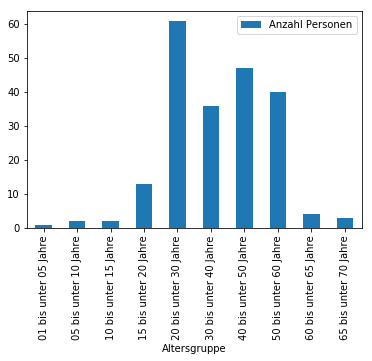

In [50]:
patricia2.plot(kind='bar')

## YOU DO IT

- Search for your name 

## Solution

In [51]:
df.head()

,Jahr,Geschlecht,Altersgruppe,Rang des Vornamen,Vorname,Hilfsmerkmal: Anzahl Name insgesamt,Anzahl Personen
0,2016,weiblich,50 bis unter 60 Jahre,2.Vorname,Maria,6099,974
1,2016,weiblich,75 Jahre und älter,2.Vorname,Maria,6099,921
2,2016,männlich,50 bis unter 60 Jahre,1.Vorname,Thomas,2062,648
3,2016,männlich,50 bis unter 60 Jahre,1.Vorname,Michael,3135,628
4,2016,weiblich,20 bis unter 30 Jahre,1.Vorname,Julia,1265,518


In [74]:
marie = df[(df['Vorname'] == 'Marie-Louise') & (df['Rang des Vornamen'] == '1.Vorname')]

In [75]:
marie

,Jahr,Geschlecht,Altersgruppe,Rang des Vornamen,Vorname,Hilfsmerkmal: Anzahl Name insgesamt,Anzahl Personen
9048,2016,weiblich,20 bis unter 30 Jahre,1.Vorname,Marie-Louise,24,5
20389,2016,weiblich,15 bis unter 20 Jahre,1.Vorname,Marie-Louise,24,2
21519,2016,weiblich,30 bis unter 40 Jahre,1.Vorname,Marie-Louise,24,2
23346,2016,weiblich,75 Jahre und älter,1.Vorname,Marie-Louise,24,2
45588,2016,weiblich,00 bis unter 01 Jahr,1.Vorname,Marie-Louise,24,1
48499,2016,weiblich,05 bis unter 10 Jahre,1.Vorname,Marie-Louise,24,1
50353,2016,weiblich,10 bis unter 15 Jahre,1.Vorname,Marie-Louise,24,1
61721,2016,weiblich,40 bis unter 50 Jahre,1.Vorname,Marie-Louise,24,1
67221,2016,weiblich,70 bis unter 75 Jahre,1.Vorname,Marie-Louise,24,1


In [76]:
marie = marie[['Anzahl Personen', 'Altersgruppe']]

In [77]:
marie = marie.set_index('Altersgruppe')

In [78]:
marie = marie.sort_index()

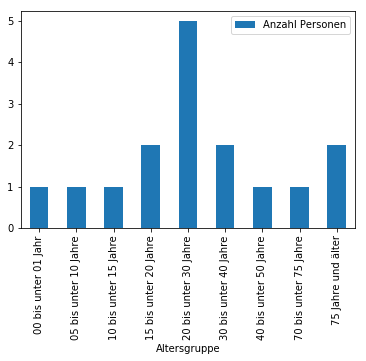

In [79]:
marie.plot(kind='bar')